In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.svm import SVC
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


all_df=pd.read_csv('car.data.csv', header=None)
all_df.head() 


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [78]:
all_df.shape

(1728, 7)

In [79]:
# Encode categorical features using LabelEncoder
label_encoders = {}
for column in all_df.columns:
    le = LabelEncoder()
    all_df[column] = le.fit_transform(all_df[column])
    label_encoders[column] = le

In [80]:
all_df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
all_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


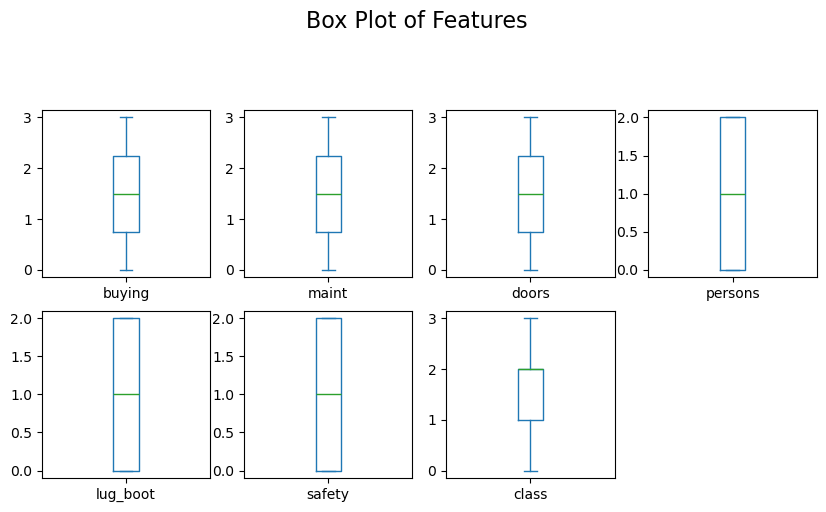

In [81]:
# Select numerical columns for the box plot
numeric_data = all_df.select_dtypes(include=[np.number])

# Plot the box plot for numerical columns only
numeric_data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, fontsize=10, figsize=(10, 10))
plt.suptitle('Box Plot of Features', fontsize=16)
plt.show()

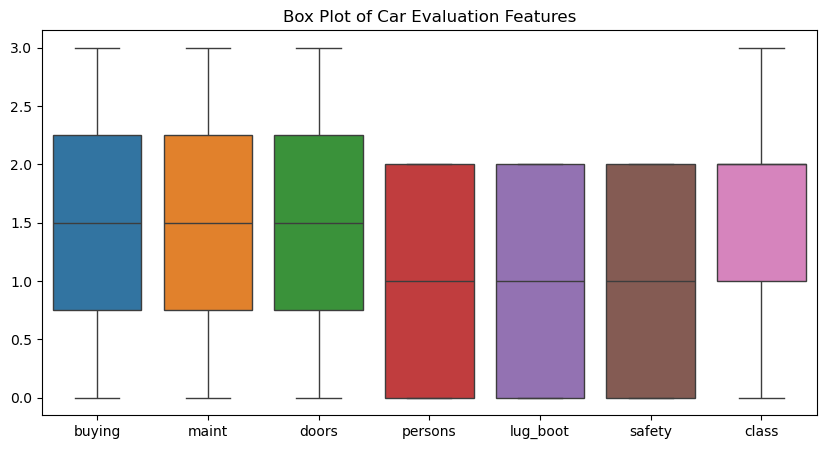

In [82]:
fig,ax=plt.subplots(1,figsize=(10,5))
sns.boxplot(data=all_df.iloc[:, :],ax=ax)
ax.set_title('Box Plot of Car Evaluation Features', fontsize=12)
plt.show()

In [83]:
# Define features (X) and target (y)
X = all_df.drop(['class'], axis=1)
y = all_df['class']
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [87]:
print('LR Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

LR Model accuracy score: 0.6590


In [88]:
# Define KFold cross-validation (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=kf)

print("Accuracy scores for each fold:", cv_scores)
print("Average CV Score:", cv_scores.mean())

Accuracy scores for each fold: [0.68592058 0.70397112 0.67753623 0.69565217 0.72463768]
Average CV Score: 0.6975435567414848


In [89]:
# Create an SVM model
svm_model = SVC()  

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

In [90]:
print("\nSVM Model accuracy Score:", accuracy_score(y_test, y_pred))


SVM Model accuracy Score: 0.9132947976878613


In [91]:
# Perform 5-fold cross-validation for SVM
k = 5
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=k, scoring='accuracy')
svm_mean_cv_accuracy = round(svm_cv_scores.mean() * 100, 2)
print(f"SVM cross-validation accuracy with k={k} is: {svm_mean_cv_accuracy} %\n")

SVM cross-validation accuracy with k=5 is: 87.19 %



In [92]:
# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

In [93]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.9739884393063584


In [94]:
# Perform 5-fold cross-validation
dt_cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')  # Adjust 'X' and 'y' as needed

# Print accuracy for each fold and the mean accuracy
print("Accuracy scores for each fold:", dt_cv_scores)
print("Mean accuracy:", np.mean(dt_cv_scores))

Accuracy scores for each fold: [0.58092486 0.83236994 0.81791908 0.86086957 0.87536232]
Mean accuracy: 0.7934891513780682


In [104]:
# Define and train the multi-layer perceptron
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, learning_rate_init=0.001, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

In [105]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.9739884393063584


In [ ]:
# Perform 5-fold cross-validation
mlp_cv_scores = cross_val_score(mlp, X, y, cv=5, scoring='accuracy')  # Adjust X and y as needed

# Print accuracy for each fold and the mean accuracy
print("Accuracy scores for each fold:", mlp_cv_scores)
print("Mean accuracy:", np.mean(mlp_cv_scores))